In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from subprocess import call
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn. model_selection import RandomizedSearchCV
from sklearn. model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import SelectFromModel

# Load and Explore Data 

#### 1. Read dataset train and test using pandas read_csv method 

In [9]:
data = pd.read_csv('LoanDatasets.csv')

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
datatest = pd.read_csv('LoanDataset_test.csv')
datatest.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


#### 2. Check the features in our data and look at their data types

In [11]:
print(data.columns)

print(datatest.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


__We have 12 independent variables and 1 target variable, i.e. Loan_Status in the dataset and print data types for each variable__

In [12]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

__Let’s look at the shape of the dataset. We have 614 rows and 13 columns in this dataset__

In [13]:
print(data.shape)
print(datatest.shape)

(631, 13)
(367, 12)


In [14]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        33
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           23
Loan_Amount_Term     14
Credit_History       51
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
datatest.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

### 3. Explanation of Variable

1. __Loan_ID__
    - Unique Load_ID
    
2. __Gender__
    - Male/Female 

3. __Married__
    - Applicant Married (Y/N)

4. __Dependents__
    - Number of Dependents

5. __Education__ 
    - Applicant Education (Graduate/Non Graduate)

6. __Self_Employed__
    - Self Employed (Y/N)

7. __ApplicantIncome__
    - Applicant Income

8. __CoApplicantIncome__
    - CoApplicant Income

9. __LoanAmount__ 
    - Loan Amount in thousand 

10. __LoanAmountTerm__
    - Term of loan in months
    
11. __Credit_History__
    - Credit history meat guidelines

12. __Property_Area__
    - Urban/Semiurban/Rural

__Target__: 

__Loan_Status__
    - Loan Approved (Y/N)

# Exploratory Data Analysis

### 1. Handling Null 

- For numerical variables: imputation __using mean or median__
- For categorical variables: imputation __using mode__

- __Handling Null for data Train__

In [16]:
#Categorical Features 
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [17]:
# Numerical Features (Loan_Amount_Term)

data['Loan_Amount_Term'].value_counts()

360.0    527
180.0     44
480.0     15
300.0     13
240.0      5
120.0      4
84.0       4
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So, I will replace the missing values in this variable using the mode of this variable. 

In [18]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

In [19]:
# Numerical Features (Loan_Amount)
data['LoanAmount'].value_counts()

120.0    21
110.0    17
100.0    16
160.0    12
187.0    12
         ..
280.0     1
42.0      1
72.0      1
240.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [20]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [21]:
### checking null 

data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<!-- - Handling Null data test -->

In [22]:
# datatest['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
# datatest['Married'].fillna(data['Married'].mode()[0], inplace=True)
# datatest['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
# datatest['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
# datatest['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
# datatest['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
# datatest['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
# checking null values datatest

# datatest.isnull().sum()
# data['Loan_Status'].value_counts()

### 2. Visualization

- __2.1. Univariate Analysis__

__Target Variable__

In [23]:
data['Loan_Status'].value_counts()

Y    435
N    196
Name: Loan_Status, dtype: int64

<AxesSubplot:>

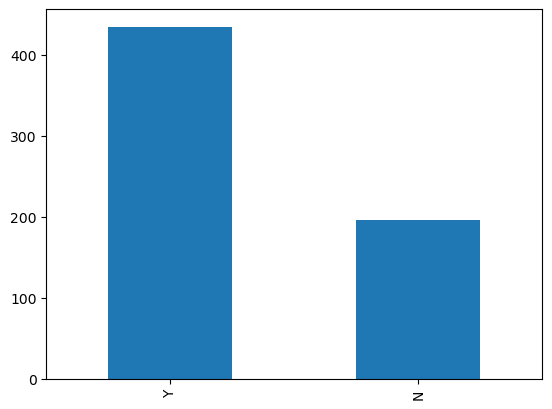

In [24]:
data['Loan_Status'].value_counts().plot.bar()

__Visualize Independent variable (Categorical Feature)__

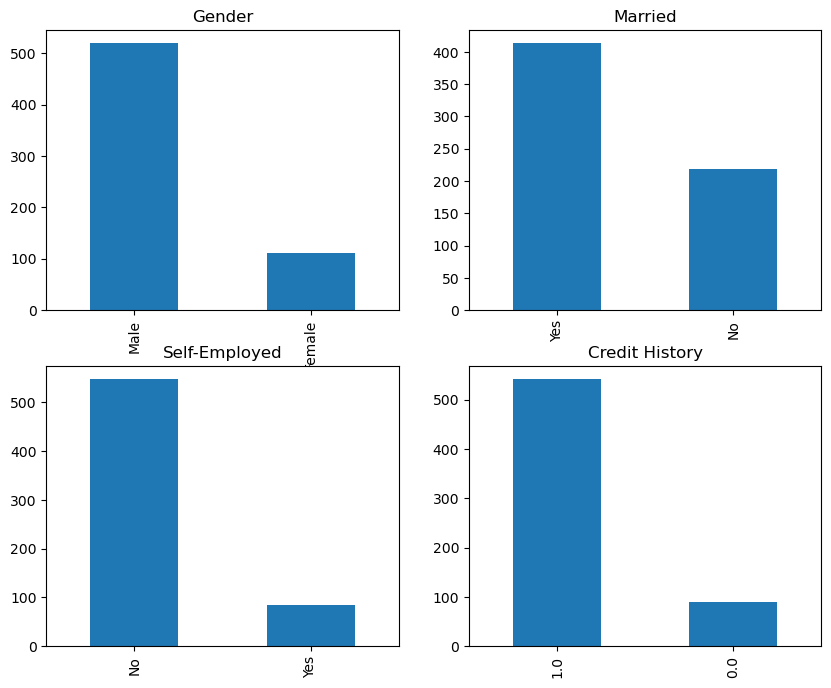

In [25]:
plt.subplot(221)
data['Gender'].value_counts().plot.bar(figsize=(10,8), title='Gender')

plt.subplot(222)
data['Married'].value_counts().plot.bar(title='Married')

plt.subplot(223)
data['Self_Employed'].value_counts().plot.bar(title='Self-Employed')

plt.subplot(224)
data['Credit_History'].value_counts().plot.bar(title='Credit History')

plt.show()

It can be seen from the above bar plots that:

- 80% applicants in the dataset are male.
- Around 65% of the applicants in the dataset are married.
- Around 15% applicants in the dataset are self employed.
- Around 85% applicants have repaid their debts.

__Visualize independent variable (Ordinal Feature)__

<AxesSubplot:title={'center':'Property_Area'}>

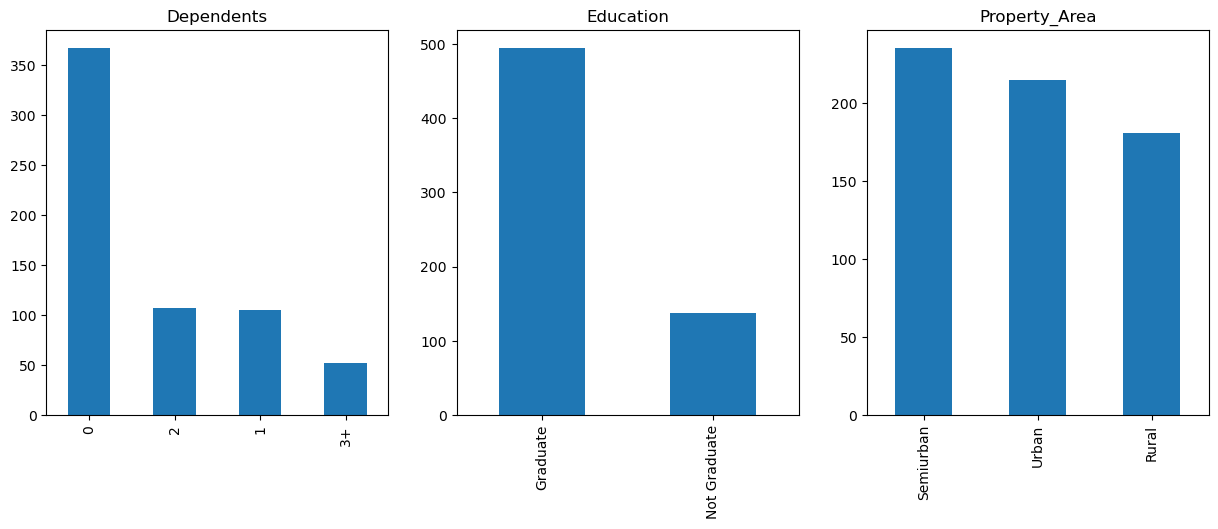

In [26]:
plt.subplot(131)
data['Dependents'].value_counts().plot.bar(figsize=(15,5), title='Dependents')

plt.subplot(132)
data['Education'].value_counts().plot.bar(title='Education')

plt.subplot(133)
data['Property_Area'].value_counts().plot.bar(title='Property_Area')

It can be seen from the above bar plots that:

- Most of the applicants don’t have any dependents.
- Around 80% of the applicants are Graduate.
- Most of the applicants are from Semiurban area.

__Visualize independent variable (Numeric Features)__

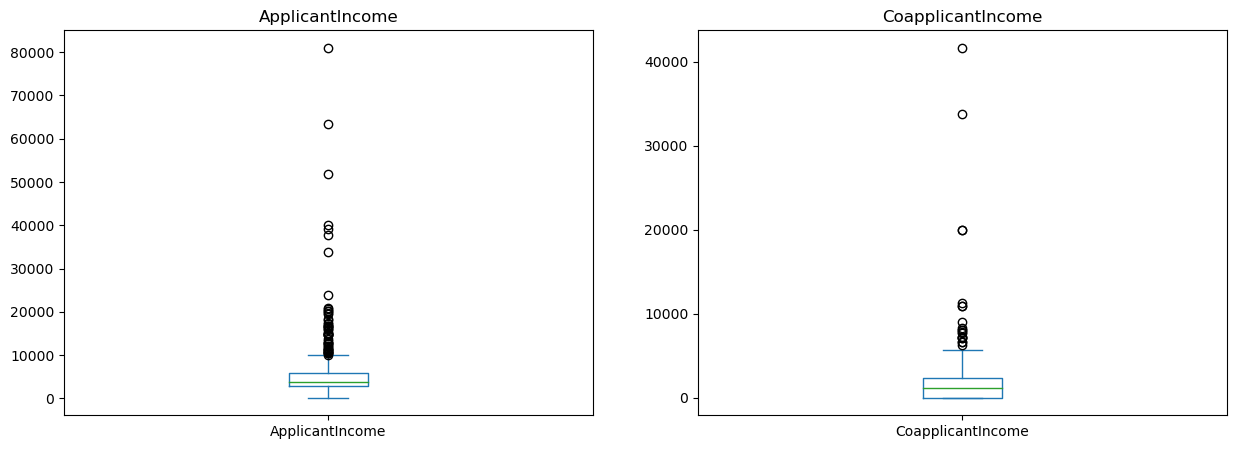

In [27]:
plt.subplot(121)
data['ApplicantIncome'].plot.box(figsize=(15,5), title='ApplicantIncome')

plt.subplot(122)
data['CoapplicantIncome'].plot.box(title='CoapplicantIncome')


plt.show()

ApplicantIncome and Education 

Text(0.5, 0.98, '')

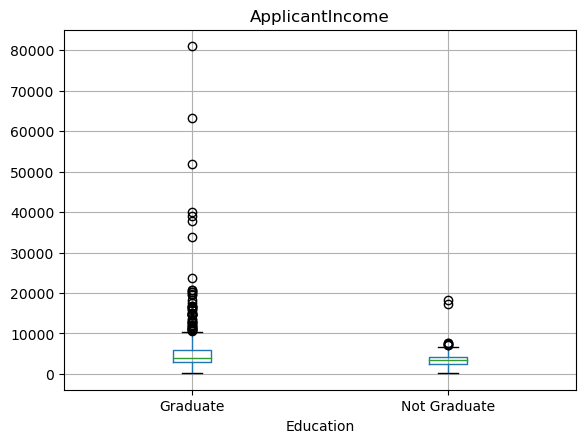

In [28]:
data.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

- __2.2. Bivariate Analysis__

__Categorical Independent Variable vs Target Variable__

<AxesSubplot:xlabel='Gender'>

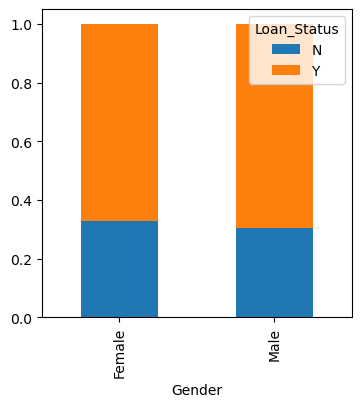

In [29]:
gender = pd.crosstab(data['Gender'],data['Loan_Status'])
gender
gender.div(gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

It can be seen that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

In [30]:
married = pd.crosstab(data['Married'], data['Loan_Status'])
dependents = pd.crosstab(data['Dependents'], data['Loan_Status'])
education = pd.crosstab(data['Education'], data['Loan_Status'])
self_employed = pd.crosstab(data['Self_Employed'], data['Loan_Status'])


# print(married)
# print(dependents)
# print(education)
# print(self_employed)

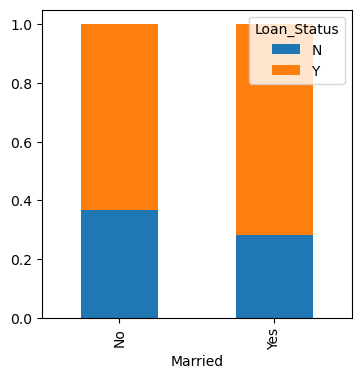

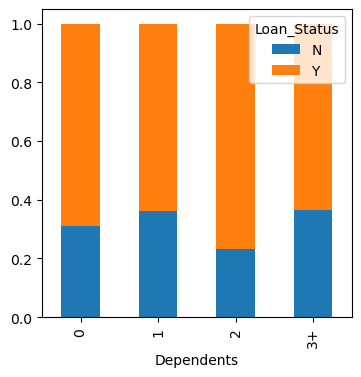

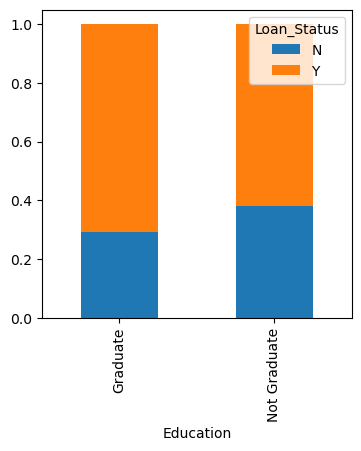

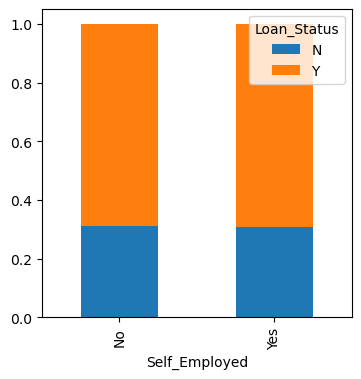

In [31]:
married.div(married.sum(1).astype(float), 
            axis=0).plot(kind="bar",stacked=True, figsize=(4,4)) 
plt.show()

dependents.div(dependents.sum(1).astype(float), 
            axis=0).plot(kind="bar",stacked=True, figsize=(4,4)) 
plt.show()


education.div(education.sum(1).astype(float), 
            axis=0).plot(kind="bar",stacked=True, figsize=(4,4)) 
plt.show()


self_employed.div(self_employed.sum(1).astype(float), 
            axis=0).plot(kind="bar",stacked=True, figsize=(4,4)) 
plt.show()

- Proportion of married applicants is higher for the approved loans.
- Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
- There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

In [32]:
credit_history = pd.crosstab(data['Credit_History'], data['Loan_Status'])
property_area = pd.crosstab(data['Property_Area'], data['Loan_Status'])

# print(credit_history)
# print(property_area)

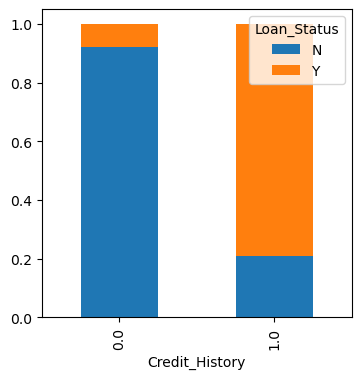

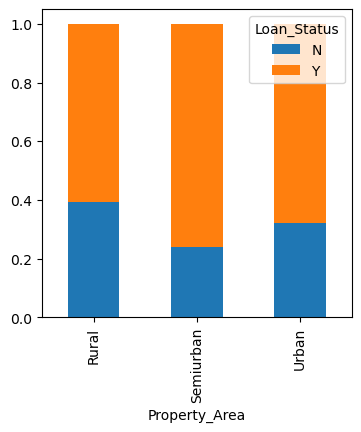

In [33]:
credit_history.div(credit_history.sum(1).astype(float), 
            axis=0).plot(kind="bar",stacked=True, figsize=(4,4)) 
plt.show()

property_area.div(property_area.sum(1).astype(float), 
            axis=0).plot(kind="bar",stacked=True, figsize=(4,4)) 
plt.show()

- It seems people with credit history as 1 are more likely to get their loans approved.
- Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

__Numerical Independent Variable vs Target Variable__

- ApplicantIncome

<AxesSubplot:xlabel='Loan_Status'>

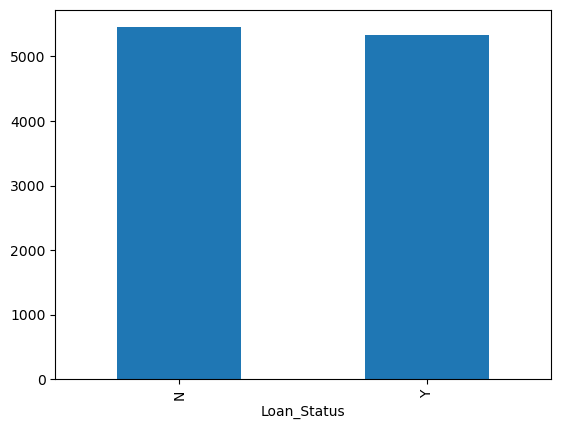

In [34]:
# Find the mean income of people for which the loan has been approved 
# vs the mean income of people for which the loan has not been approved.
data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [35]:
# pd.qcut(data['ApplicantIncome'], q=4)

the y-axis represents the mean applicant income. We don't see any change in the mean income. So, I will make the bins for the applicant income variable. 

In [36]:
bins = [0,2500,4000,6000,81000]
group = ['Low', 'Average', 'High', 'Very High']

In [37]:
data['income_bin'] = pd.cut(data['ApplicantIncome'],bins, labels=group)
income_bin = pd.crosstab(data['income_bin'], data['Loan_Status'])
income_bin

Loan_Status,N,Y
income_bin,,
Low,35,77
Average,68,164
High,46,103
Very High,47,91


Text(0, 0.5, 'Percentage')

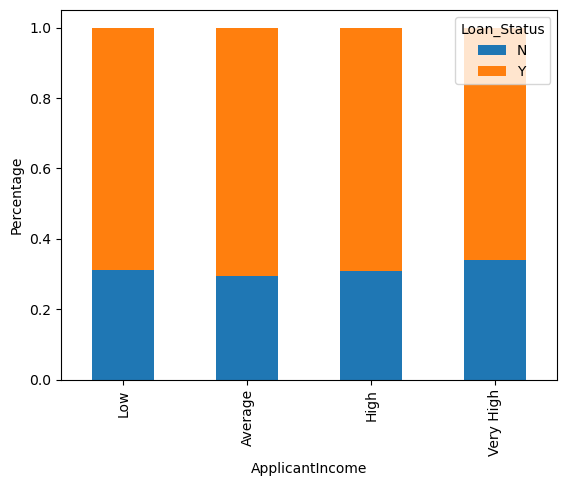

In [38]:
income_bin.div(income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

It can be inferred that applicant income does not affect the chances of loan approval. 

- CoApplicant Income

In [39]:
# pd.qcut(data['CoapplicantIncome'], q=4, duplicates='drop')

In [40]:
binsco = [0, 1000, 2000, 3000, 42000]
groupco = ['Low', 'Average', 'High', 'Very High']

In [41]:
data['coappincome_bin'] = pd.cut(data['CoapplicantIncome'],binsco, labels=groupco)
coappincome_bin = pd.crosstab(data['coappincome_bin'], data['Loan_Status'])
coappincome_bin

Loan_Status,N,Y
coappincome_bin,,
Low,3,20
Average,36,91
High,28,75
Very High,33,67


Text(0, 0.5, 'Percentage')

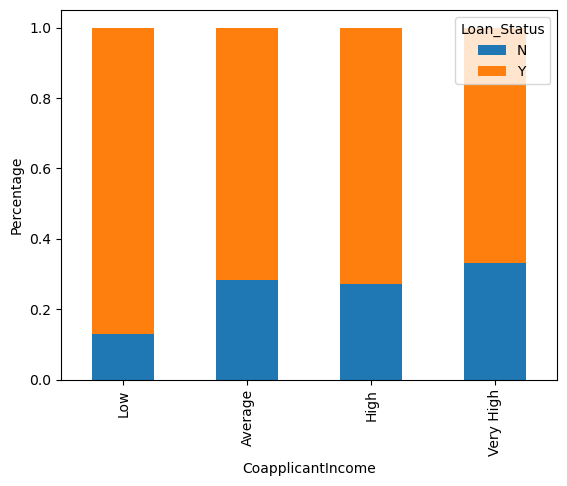

In [42]:
coappincome_bin.div(coappincome_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

It shows that if coapplicant's income is less, the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don't have any coapplicant so the coapplicant income for such applicant is 0 and hence the loan approval is not dependent on it. 

so we can make a new variable in which we will combine the applicant's and coapplicant's income to visualize the combind effect of income on loan approval. 

###gimana cara ngitung applicant yang punya coapplicant income == 0???

In [43]:
### Combine applicantincome and coapplicant income 

data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
# data

In [44]:
binstotal = [0,2500,4000,6000,81000]
grouptotal = ['Low', 'Average', 'High', 'Very High']

In [45]:
data['Total_Income_bin'] = pd.cut(data['Total_Income'], binstotal,labels=grouptotal)
Total_Income_bin =pd.crosstab(data['Total_Income_bin'],data['Loan_Status'])
# data

Text(0, 0.5, 'Percentage')

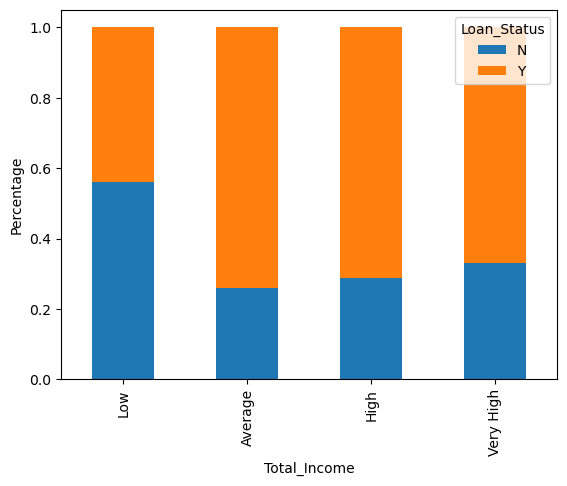

In [46]:
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

Proportion of loans getting approved for applicant having low Total_Income is verry less as compared to that applicant with average, high, and very high income. 

- Loan Amount 

In [47]:
# pd.qcut(data['LoanAmount'], q=4)

In [48]:
binsloan = [0, 100, 200, 700]
grouploan = ['Low', 'Average', 'High']

Text(0, 0.5, 'Percentage')

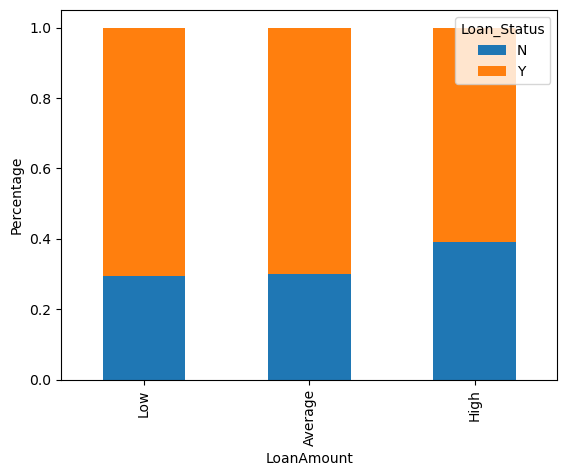

In [49]:
data['loanamount_bin'] = pd.cut(data['LoanAmount'], binsloan,labels=grouploan) 
loanamount_bin = pd.crosstab(data['loanamount_bin'], data['Loan_Status'])
loanamount_bin.div(loanamount_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

It can bee seen that the proportion of approved loans is higher for low and average loan amount. 

In [50]:
###drop bins
###change 3+ in dependents variable => 3 
###convert target variable's categories into 0 and 1 so that i can find its correlation with numerical variables. 
###replace N = 0, Y = 1 

In [51]:
# Drop bins 
data = data.drop(['income_bin', 'coappincome_bin', 'loanamount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [52]:
### change 3+ => 

data['Dependents'].replace('3+', 3, inplace=True)
datatest['Dependents'].replace('3+', 3, inplace=True)

# data.Dependents = data.Dependents.astype("int")
# datatest.Dependents = datatest.Dependents.astype("int")

# data.dtypes

In [53]:
# data

# Data Preprocessing

### __1. Label Encoder__

- Data Train

In [54]:
var=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
labelencoder = LabelEncoder()
for i in var:
    data[i]= data[i].astype('str')

for i in var:
    data[i] = labelencoder.fit_transform(data[i])
# df.dtypes  
# le = LabelEncoder()
# data['Dependents']=le.fit_transform(data['Dependents'])

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,127.5,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [55]:
# data.info()

- Data Test

In [56]:
datatest.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [57]:
vartest = ['Gender','Married','Education','Self_Employed','Property_Area']
labelencoder = LabelEncoder()
for i in vartest:
    datatest[i]= datatest[i].astype('str')

for i in vartest:
    datatest[i] = labelencoder.fit_transform(datatest[i])

datatest.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,NaN,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


### __2. Correlation__

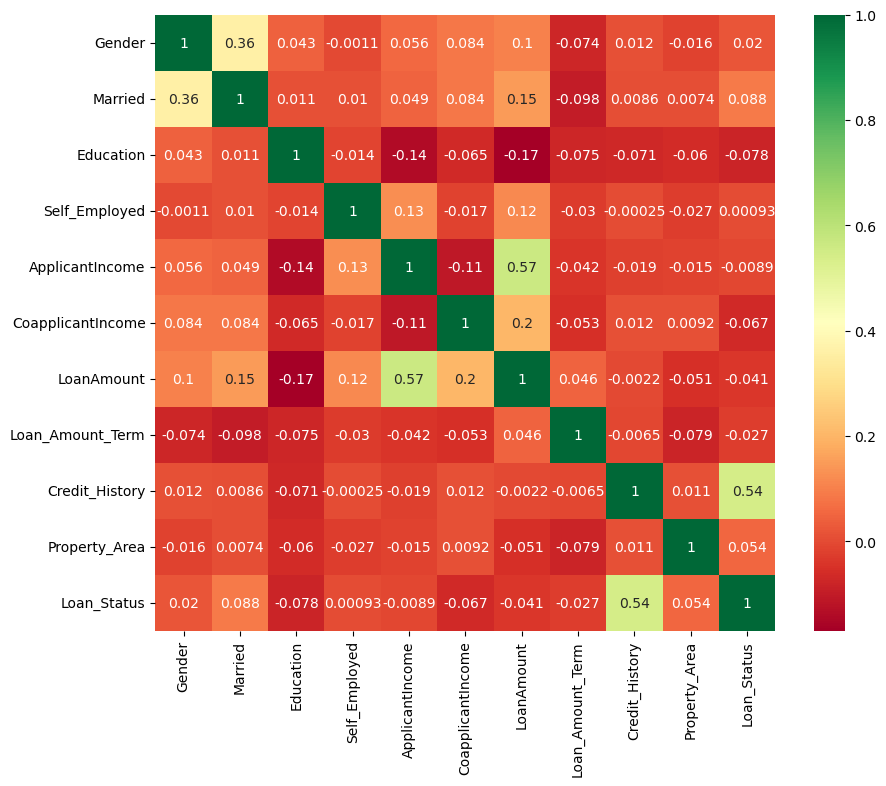

In [58]:
plt.figure(figsize=(10,8))
sb.heatmap(data.corr(),annot=True,cmap="RdYlGn")
plt.show()

The most correlated variables are (ApplicantIncome - LoanAmount) and (Loan_Status - Credit_History)

In [59]:
# data.head()

### __3. Standardization__

- finding outlier

- __Data Train__

In [60]:
stdscaler = StandardScaler()
datastd = data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
dataencod = data[['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']]

std = stdscaler.fit_transform(datastd)
std= pd.DataFrame(std, columns= ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'])

#CARI OUTLIER
std[(std < -2.5) | (std > 2.5)] = np.NaN
std.isnull().sum()

# INVERSE KE NILAI SEMULA
invstd= stdscaler.inverse_transform(std)
invstd= pd.DataFrame(invstd, columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'])
invstd['CoapplicantIncome']= round(invstd['CoapplicantIncome'])
invstd

#CONCAT 
feature= pd.concat([dataencod,invstd],axis=1 ,ignore_index=False, sort=False)
feature

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,0,0,0,0,1.0,2,5849.0,0.0,127.5,360.0
1,1,1,1,0,0,1.0,0,4583.0,1508.0,128.0,360.0
2,1,1,0,0,1,1.0,2,3000.0,0.0,66.0,360.0
3,1,1,0,1,0,1.0,2,2583.0,2358.0,120.0,360.0
4,1,0,0,0,0,1.0,2,6000.0,0.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...
626,1,1,2,0,0,1.0,2,3073.0,8106.0,200.0,360.0
627,1,0,0,0,0,1.0,0,1853.0,2840.0,114.0,360.0
628,1,1,2,0,0,1.0,2,1299.0,1086.0,17.0,NaN
629,1,0,0,0,0,1.0,2,4950.0,0.0,125.0,360.0


In [61]:
feature.isnull().sum()

# GABUNGIN DULU TABEL KOLOM TARGET 
feature['Loan_Status'] = data['Loan_Status']
feature.head()


#DROP OUTLIER 
feature= feature.dropna()
feature.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Credit_History       0
Property_Area        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Loan_Status          0
dtype: int64

In [62]:
# feature['Dependents']=feature['Dependents'].astype('int64') 
# # feature.dtypes

In [63]:
# feature.isnull().sum()

In [64]:
feature

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,0,0,0,0,1.0,2,5849.0,0.0,127.5,360.0,1
1,1,1,1,0,0,1.0,0,4583.0,1508.0,128.0,360.0,0
2,1,1,0,0,1,1.0,2,3000.0,0.0,66.0,360.0,1
3,1,1,0,1,0,1.0,2,2583.0,2358.0,120.0,360.0,1
4,1,0,0,0,0,1.0,2,6000.0,0.0,141.0,360.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
625,1,1,2,0,0,1.0,2,2500.0,1840.0,109.0,360.0,1
626,1,1,2,0,0,1.0,2,3073.0,8106.0,200.0,360.0,1
627,1,0,0,0,0,1.0,0,1853.0,2840.0,114.0,360.0,0
629,1,0,0,0,0,1.0,2,4950.0,0.0,125.0,360.0,1


- __Data Test__

In [65]:
# stdscalertest = StandardScaler()
datastdtest = datatest[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
dataencodetest = datatest[['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']]

# #CONCAT 
featuretest= pd.concat([dataencodetest,datastdtest],axis=1 ,ignore_index=False, sort=False)
featuretest.isnull().sum()

Gender                0
Married               0
Dependents           10
Education             0
Self_Employed         0
Credit_History       29
Property_Area         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
dtype: int64

### __4. Splitting Dataset (Train and Validation)__

Divide our train dataset into two parts: __train and validation__.

In [66]:
#Data Train 

x= feature.drop('Loan_Status', axis=1)
y= feature['Loan_Status']

#Splitting 

xtr, xval, ytr, yval = train_test_split(x,y, test_size=0.20,random_state=107)
# len(yval)

In [67]:
print(len(xtr))
print(len(ytr))

print(len(xval))
print(len(yval))

437
437
110
110


## ML MODELLING

### 1. Logistic Regression 

In [68]:
logreg = LogisticRegression()
logreg.fit(xtr, ytr)
logreg.score(xval, yval)

0.8

### 2. Random Forest 

In [69]:
rfmodel = RandomForestClassifier(n_estimators=100)
rfmodel.fit(xtr, ytr)
rfmodel.score(xval, yval)

0.7909090909090909

### 3. K-Nearest Neighbors

In [70]:
## nilai K
k = round(xtr.shape[0] ** .5)
k
knnmodel = KNeighborsClassifier(n_neighbors=k)
knnmodel.fit(xtr, ytr)
knnmodel.score(xval, yval)

0.6545454545454545

## Optimise the model by tuning the hyperparameters 

### 1. Logistic Regression

In [71]:
penalty = ['l1','l2','elasticnet','none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [1, 10, 100, 1000, 10000]
c = [1.0]
multi_class = ['auto', 'ovr', 'multinomial']

param = {
    'penalty':penalty, 'solver':solver, 'max_iter':max_iter, 'C':c,'multi_class':multi_class
}
param

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'max_iter': [1, 10, 100, 1000, 10000],
 'C': [1.0],
 'multi_class': ['auto', 'ovr', 'multinomial']}

In [72]:
# model = LogisticRegression()
# modelgs = GridSearchCV(model, param, cv = 3 )
# modelgs.fit(xtr,ytr)
# modelgs.best_params_

In [73]:
modellogreg = LogisticRegression(
    C=1.0, solver='liblinear', penalty='l1', max_iter=10, multi_class='auto'
)
modellogreg.fit(xtr,ytr)
modellogreg.score(xval, yval)

0.8

### 2. Random Forest

In [74]:
# model = RandomForestClassifier()
# #hyper parameters set
# n_estimators = [int(x) for x in np.linspace(start=100, stop=500, num=4)]
# max_features = ['auto', 'sqrt']
# max_depth = [int(x) for x in np.linspace(10,80,num=5)]
# max_depth.append(None)
# min_samples_split = [2,5,10]
# min_samples_leaf = [1,2,4]
# bootstrap = [True, False]

# # print(n_estimators)
# # print(max_depth)
# param = {'n_estimators':n_estimators,
#          'max_features':max_features,
#          'max_depth':max_depth,
#          'min_samples_leaf':min_samples_leaf,
#          'min_samples_split':min_samples_split,
#          'bootstrap':bootstrap
#         }

# modelgs = GridSearchCV(model, param, cv = 3 )
# modelgs.fit(xtr,ytr)
# modelgs.best_params_

In [75]:
modelrf = RandomForestClassifier(
    bootstrap=True, max_depth=80,max_features='auto',min_samples_leaf=4,min_samples_split=10,n_estimators=100
)
modelrf.fit(xtr,ytr)
modelrf.score(xval, yval)

0.8

### 3. K-Nearest Neighbors

In [76]:
# model = KNeighborsClassifier()
# #hyper parameters set
# leaf_size = list(range(1,50))
# n_neighbors = list(range(1,30))
# p = [1,2]
# weights = 'uniform', 'distance'
# algorithm = 'auto', 'ball_tree','kd_tree','brute'

# #Hyper Parameters Set
# param = {'leaf_size':leaf_size,
#           'n_neighbors':n_neighbors,
#           'p':p,
#           'weights':weights,
#           'algorithm':algorithm}

# modelgs = GridSearchCV(model, param, cv = 3 )
# modelgs.fit(xtr,ytr)
# modelgs.best_params_

In [77]:
modelknn = KNeighborsClassifier(
    algorithm='auto',leaf_size=1,n_neighbors=21,p=1,weights='uniform'
)
modelknn.fit(xtr,ytr)
modelknn.score(xval, yval)

0.6636363636363637

In [78]:
print('Score after Hyper-Parameter Tuning :\n')
print('Logistic Regression Score = {} \nRandom Forest Score = {} \nKNN Score = {} '
      .format(modellogreg.score(xval,yval), modelrf.score(xval,yval), modelknn.score(xval,yval)))

Score after Hyper-Parameter Tuning :

Logistic Regression Score = 0.8 
Random Forest Score = 0.8 
KNN Score = 0.6636363636363637 


# Feature Engineering

### 1. Feature Selection Using Random Forest

In [79]:
sfmRF = SelectFromModel(modelrf, threshold=0.10)

# Train the selector
sfmRF.fit(xtr, ytr)

SelectFromModel(estimator=RandomForestClassifier(max_depth=80,
                                                 min_samples_leaf=4,
                                                 min_samples_split=10),
                threshold=0.1)

In [80]:
feat_labels = xtr.columns

# Print the name and gini importance of each feature
for feature in zip(feat_labels, modelrf.feature_importances_):
    print(feature)

('Gender', 0.013636554099277519)
('Married', 0.030340341992989944)
('Dependents', 0.029396418946675752)
('Education', 0.016333078123462758)
('Self_Employed', 0.005137706862122293)
('Credit_History', 0.49868820446659545)
('Property_Area', 0.035449108328863915)
('ApplicantIncome', 0.13224088623029326)
('CoapplicantIncome', 0.08046280503340357)
('LoanAmount', 0.13785818065367758)
('Loan_Amount_Term', 0.020456715262637874)


In [81]:
for feature_list_index in sfmRF.get_support(indices=True):
    print(feat_labels[feature_list_index])
# selected_feat= xtr.columns[(sfm.get_support())]
# len(selected_feat)
# print(selected_feat)

Credit_History
ApplicantIncome
LoanAmount


In [82]:
# Create A Data Subset With Only The Most Important Features
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and val X data.

x_important_train = sfmRF.transform(xtr)
x_important_val = sfmRF.transform(xval)
# x_important_train.shape
# x_important_test = sfm.tranform(featuretest)

In [83]:
# Train A New Random Forest Classifier Using Only Most Important Features
# Create a new random forest classifier for the most important features

rfimp = RandomForestClassifier(
    bootstrap=True, max_depth=80,max_features='auto',min_samples_leaf=4,min_samples_split=10,n_estimators=100
)

# Train the new classifier on the new dataset containing the most important features
rfimp.fit(x_important_train,ytr)

RandomForestClassifier(max_depth=80, min_samples_leaf=4, min_samples_split=10)

In [84]:
# Apply The Full Featured Classifier To The Test Data
y_pred = modelrf.predict(xval)

# View The Accuracy Of Our Full Feature
accuracy_score(yval, y_pred)

0.8

In [85]:
# Apply The 4 Featured Classifier To The Test Data
y_important_predrf = rfimp.predict(x_important_val)

# View The Accuracy Of Our Limited Feature
accuracy_score(yval, y_important_predrf)

0.8090909090909091

### 2. Feature Selection Using Logistic Regression

In [86]:
lgimp = LogisticRegression(
    C=1.0, solver='newton-cg', penalty='l2', max_iter=100, multi_class='auto'
)

# Train the new classifier on the new dataset containing the most important features
lgimp.fit(x_important_train,ytr)

LogisticRegression(solver='newton-cg')

In [87]:
#FULL FEATURE
y_pred = modellogreg.predict(xval)
accuracy_score(yval, y_pred)

0.8

In [88]:
#IMPORTANT FEATURE
y_important_predlg = lgimp.predict(x_important_val)
accuracy_score(yval, y_important_predlg)

0.8

### 3. Feature Selection Using K-Nearest Neighbors

In [89]:
knnimp = KNeighborsClassifier(
    algorithm='auto',leaf_size=1,n_neighbors=21,p=1,weights='uniform'
)

# Train the new classifier on the new dataset containing the most important features
knnimp.fit(x_important_train,ytr)

KNeighborsClassifier(leaf_size=1, n_neighbors=21, p=1)

In [90]:
#FULL FEATURE
y_pred = modelknn.predict(xval)
accuracy_score(yval, y_pred)

0.6636363636363637

In [91]:
#IMPORTANT FEATURE
y_important_predknn = knnimp.predict(x_important_val)
accuracy_score(yval, y_important_predknn)

0.6454545454545455

### Predict

In [92]:
datapredik= pd.DataFrame(yval)
datapredik['target actual'] = yval
datapredik['y prediksi KNN']= y_important_predknn
datapredik['y prediksi LogReg']= y_important_predlg
datapredik['y prediksi RanFor']= y_important_predrf
datapredik

,Loan_Status,target actual,y prediksi KNN,y prediksi LogReg,y prediksi RanFor
161,0,0,1,1,1
477,0,0,1,0,0
388,1,1,1,1,1
28,0,0,1,1,1
50,1,1,1,1,1
...,...,...,...,...,...
23,0,0,1,0,0
440,1,1,1,1,1
143,1,1,1,1,1
279,1,1,1,1,1


In [93]:
print(accuracy_score(yval, y_important_predknn))
print(accuracy_score(yval, y_important_predlg))
print(accuracy_score(yval, y_important_predrf))

0.6454545454545455
0.8
0.8090909090909091


### __Score Model__

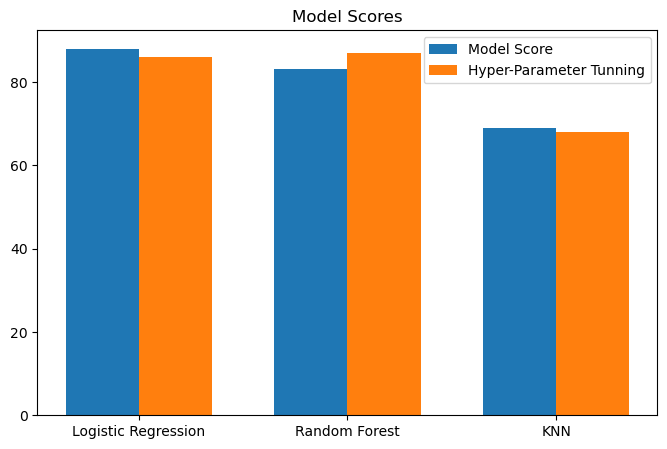

In [94]:
N = 3
score = (88, 83, 69)

fig, ax = plt.subplots(figsize=(8,5))

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, score, width, bottom=0)

hyperparameter = (86, 87, 68)
p2 = ax.bar(ind + width, hyperparameter, width, bottom=0)

ax.set_title('Model Scores')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Logistic Regression', 'Random Forest', 'KNN'))
ax.legend((p1[0], p2[0]), ('Model Score', 'Hyper-Parameter Tunning'))
ax.autoscale_view()
plt.show()

## Model performance and evaluation # Evaluation Metrics

### 1. Logistic Regression

In [95]:
tnlogreg, fplogreg, fnlogreg, tplogreg = confusion_matrix(datapredik['target actual'],datapredik['y prediksi LogReg']).ravel()
print(tnlogreg, fplogreg, fnlogreg, tplogreg)

print('recall (+) =', recall_score(datapredik['target actual'],datapredik['y prediksi LogReg']))
print('recall (-) =', recall_score(datapredik['target actual'],datapredik['y prediksi LogReg']))
print('Precision (+) = ', precision_score(datapredik['target actual'],datapredik['y prediksi LogReg']))
print('Precision (-) = ', precision_score(datapredik['target actual'],datapredik['y prediksi LogReg']))

#Hitung Balanced Accuracy
recallP = tplogreg/(tplogreg + fnlogreg)
recallN = tnlogreg/(fplogreg+tnlogreg)
bAcc= (recallP + recallN)/2
print('bAcc=', bAcc)

#Hitung F1 Score 
print('F1 Score (+) =', f1_score(datapredik['target actual'],datapredik['y prediksi LogReg']))
print('F1 Score (-) =', f1_score(datapredik['target actual'],datapredik['y prediksi LogReg']))

print('roc_auc_score =',roc_auc_score(datapredik['target actual'],datapredik['y prediksi LogReg'].tolist(), average='macro', multi_class='ovo'))
# np.array(yts.tolist()).shape

16 20 2 72
recall (+) = 0.972972972972973
recall (-) = 0.972972972972973
Precision (+) =  0.782608695652174
Precision (-) =  0.782608695652174
bAcc= 0.7087087087087087
F1 Score (+) = 0.8674698795180723
F1 Score (-) = 0.8674698795180723
roc_auc_score = 0.7087087087087087


### 2. Random Forest

In [96]:
tnrf, fprf, fnrf, tprf = confusion_matrix(datapredik['target actual'],datapredik['y prediksi RanFor']).ravel()
tnrf, fprf, fnrf, tprf

print('recall (+) =', recall_score(datapredik['target actual'],datapredik['y prediksi RanFor']))
print('recall (-) =', recall_score(datapredik['target actual'],datapredik['y prediksi RanFor']))
print('Precision (+) = ', precision_score(datapredik['target actual'],datapredik['y prediksi RanFor']))
print('Precision (-) = ', precision_score(datapredik['target actual'],datapredik['y prediksi RanFor']))

#Hitung Balanced Accuracy
recallP = tprf/(tprf + fnrf)
recallN = tnrf/(fprf+tnrf)
bAcc= (recallP + recallN)/2
print('bAcc=', bAcc)

#Hitung F1 Score 
print('F1 Score (+) =', f1_score(datapredik['target actual'],datapredik['y prediksi RanFor']))
print('F1 Score (-) =', f1_score(datapredik['target actual'],datapredik['y prediksi RanFor']))

print('roc_auc_score =',roc_auc_score(datapredik['target actual'],datapredik['y prediksi RanFor'].tolist(), average='macro', multi_class='ovo'))
# np.array(yts.tolist()).shape

recall (+) = 0.972972972972973
recall (-) = 0.972972972972973
Precision (+) =  0.7912087912087912
Precision (-) =  0.7912087912087912
bAcc= 0.7225975975975976
F1 Score (+) = 0.8727272727272727
F1 Score (-) = 0.8727272727272727
roc_auc_score = 0.7225975975975976


### 3. K-Nearest Neighbors 

In [97]:
tnknn, fpknn, fnknn, tpknn = confusion_matrix(datapredik['target actual'],datapredik['y prediksi KNN']).ravel()
tnknn, fpknn, fnknn, tpknn 

print('recall (+) =', recall_score(datapredik['target actual'],datapredik['y prediksi KNN']))
print('recall (-) =', recall_score(datapredik['target actual'],datapredik['y prediksi KNN']))
print('Precision (+) = ', precision_score(datapredik['target actual'],datapredik['y prediksi KNN']))
print('Precision (-) = ', precision_score(datapredik['target actual'],datapredik['y prediksi KNN']))

#Hitung Balanced Accuracy
recallP = tprf/(tprf + fnrf)
recallN = tnrf/(fprf+tnrf)
bAcc= (recallP + recallN)/2
print('bAcc=', bAcc)

#Hitung F1 Score 
print('F1 Score (+) =', f1_score(datapredik['target actual'],datapredik['y prediksi KNN']))
print('F1 Score (-) =', f1_score(datapredik['target actual'],datapredik['y prediksi KNN']))

print('roc_auc_score =',roc_auc_score(datapredik['target actual'],datapredik['y prediksi KNN'].tolist(), average='macro', multi_class='ovo'))
# np.array(yts.tolist()).shape

recall (+) = 0.9459459459459459
recall (-) = 0.9459459459459459
Precision (+) =  0.6666666666666666
Precision (-) =  0.6666666666666666
bAcc= 0.7225975975975976
F1 Score (+) = 0.782122905027933
F1 Score (-) = 0.782122905027933
roc_auc_score = 0.48686186186186187


In [98]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(yval, y_important_predlg))
print(classification_report(yval, y_important_predlg))

print(confusion_matrix(yval, y_important_predrf))
print(classification_report(yval, y_important_predrf))

[[16 20]
 [ 2 72]]
              precision    recall  f1-score   support

           0       0.89      0.44      0.59        36
           1       0.78      0.97      0.87        74

    accuracy                           0.80       110
   macro avg       0.84      0.71      0.73       110
weighted avg       0.82      0.80      0.78       110

[[17 19]
 [ 2 72]]
              precision    recall  f1-score   support

           0       0.89      0.47      0.62        36
           1       0.79      0.97      0.87        74

    accuracy                           0.81       110
   macro avg       0.84      0.72      0.75       110
weighted avg       0.83      0.81      0.79       110

